# Prediksi Sales Shampoo dengan LSTM

Dataset yang dianalisis dalam penelitian ini merupakan dataset dari website Kaggle yang dibuat oleh SHENBAGAKUMARS. Kumpulan data yang digunakan pada penelitian ini terdiri dari 2 atribut tahun dan 36 record. Dari data ini akan dilakukan training dengan metode LSTM.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/iklim_kemayoran_18_22.csv')
df.head(10)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ff_avg
0,2018-01-01,25.0,33.2,28.6,78.0,46.4,1.0
1,2018-01-02,26.0,33.6,29.8,69.0,0.0,1.0
2,2018-01-03,27.0,31.2,28.4,77.0,0.0,1.0
3,2018-01-04,26.0,33.8,29.3,75.0,1.0,1.0
4,2018-01-05,27.0,30.8,28.9,68.0,0.5,3.0
5,2018-01-06,26.0,32.8,28.9,69.0,0.0,3.0
6,2018-01-07,26.0,30.4,28.8,75.0,8888.0,1.0
7,2018-01-08,27.0,32.2,28.6,74.0,0.0,2.0
8,2018-01-09,27.0,30.6,28.4,76.0,0.0,2.0
9,2018-01-10,25.0,31.6,28.3,73.0,8888.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  1813 non-null   object 
 1   Tn       1813 non-null   float64
 2   Tx       1813 non-null   float64
 3   Tavg     1813 non-null   float64
 4   RH_avg   1813 non-null   float64
 5   RR       1809 non-null   float64
 6   ff_avg   1708 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.3+ KB


In [ ]:
#Missing values computation

df.isnull().sum()

Tanggal      0
Tn           0
Tx           0
Tavg         0
RH_avg       0
RR           4
ff_avg     105
dtype: int64

In [ ]:
df=df.dropna(axis=0)

# Mengubah kolom 'Month' menjadi indeks datetime

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace= True)


#Memvisualisasikan data

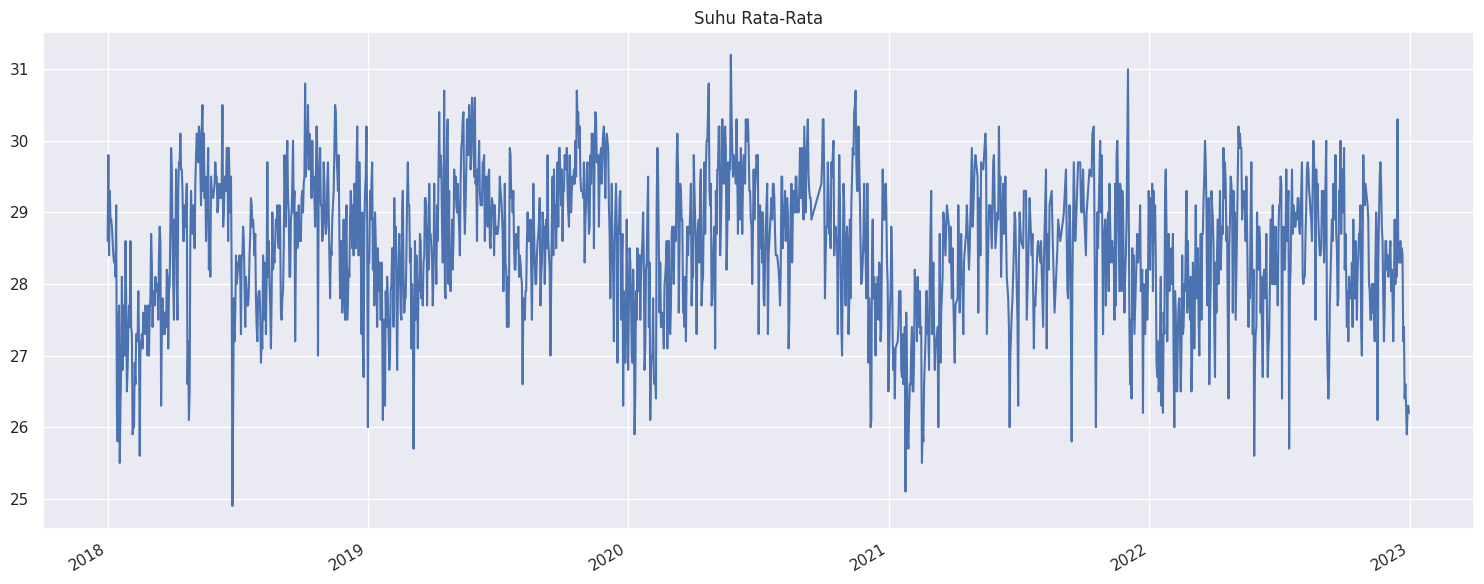

In [ ]:
plt.figure(figsize=(15, 6))
df['Tavg'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Suhu Rata-Rata")
plt.tight_layout()
plt.show()

#Melihat data shape

In [ ]:
n_cols = 1
dataset = df['Tavg']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1708, 1)

#Melakukan komputasi MinMaxScaler 
yang mempertahankan bentuk distribusi asli dengan mengurangkan nilai minimum dalam fitur lalu membagi dengan range

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

#Melakukan splitting data 
menjadi 75:25 untuk training dan testing

In [ ]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1281 Test Size : 427


In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1281, 1)

# Menentukan training set dengan 13 time steps.

In [ ]:
x_train = []
y_train = []
time_steps = 50
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.58730159],
       [0.77777778],
       [0.55555556],
       [0.6984127 ],
       [0.63492063],
       [0.63492063],
       [0.61904762],
       [0.58730159],
       [0.55555556],
       [0.53968254],
       [0.55555556],
       [0.50793651],
       [0.66666667],
       [0.20634921],
       [0.14285714],
       [0.3968254 ],
       [0.44444444],
       [0.0952381 ],
       [0.22222222],
       [0.3015873 ],
       [0.50793651],
       [0.3015873 ],
       [0.44444444],
       [0.38095238],
       [0.33333333],
       [0.58730159],
       [0.46031746],
       [0.25396825],
       [0.3015873 ],
       [0.3968254 ],
       [0.44444444],
       [0.3968254 ],
       [0.58730159],
       [0.3968254 ],
       [0.38095238],
       [0.15873016],
       [0.17460317],
       [0.17460317],
       [0.31746032],
       [0.26984127],
       [0.38095238],
       [0.36507937],
       [0.36507937],
       [0.47619048],
       [0.36507937],
       [0.11111111],
       [0.36507937],
  

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

#Training set dikonversi menjadi numpy array dan dibentuk shape-nya.

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [ ]:
x_train.shape , y_train.shape

((1658, 50, 1), (1658, 1))

#Membangun model LSTM 
dengan 3 layer LSTM dengan layer pertama sebesar 200 neuron, layer kedua sebesar 10 neuron dan layer ketiga sebesar 50 neuron serta layer dense dengan layer pertama sebesar 20 neuron, layer kedua sebesar 10 neuron, dan layer ketiga sebesar 1 neuron. Optimizer menggunakan optimizer adam, untuk loss terdapat mean_absolute_error. 

In [ ]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics= "mean_absolute_error")
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 200)           161600    
                                                                 
 lstm_10 (LSTM)              (None, 50, 100)           120400    
                                                                 
 lstm_11 (LSTM)              (None, 50)                30200     
                                                                 
 dense_9 (Dense)             (None, 20)                1020      
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 313,441
Trainable params: 313,441
Non-tr

#Melakukan fit model 
dengan epoch sebesar 100 dan ukuran batch sebesar 32

In [ ]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
52/52 [==============================] - 15s 189ms/step - loss: 0.0860 - mean_absolute_error: 0.2315
Epoch 2/100
52/52 [==============================] - 12s 237ms/step - loss: 0.0192 - mean_absolute_error: 0.1089
Epoch 3/100
52/52 [==============================] - 11s 207ms/step - loss: 0.0190 - mean_absolute_error: 0.1083
Epoch 4/100
52/52 [==============================] - 11s 211ms/step - loss: 0.0188 - mean_absolute_error: 0.1071
Epoch 5/100
52/52 [==============================] - 11s 205ms/step - loss: 0.0188 - mean_absolute_error: 0.1071
Epoch 6/100
52/52 [==============================] - 12s 234ms/step - loss: 0.0193 - mean_absolute_error: 0.1088
Epoch 7/100
52/52 [==============================] - 10s 186ms/step - loss: 0.0187 - mean_absolute_error: 0.1064
Epoch 8/100
52/52 [==============================] - 11s 211ms/step - loss: 0.0186 - mean_absolute_error: 0.1066
Epoch 9/100
52/52 [==============================] - 11s 214ms/step - loss: 0.0187 - mean_absolu

#Mengukur Loss
Dari hasil dapat disimpulkan bahwa kurva model loss menunjukan hasil kurva menurun dengan baik dan tidak terjadi overfitting yang berlebihan.

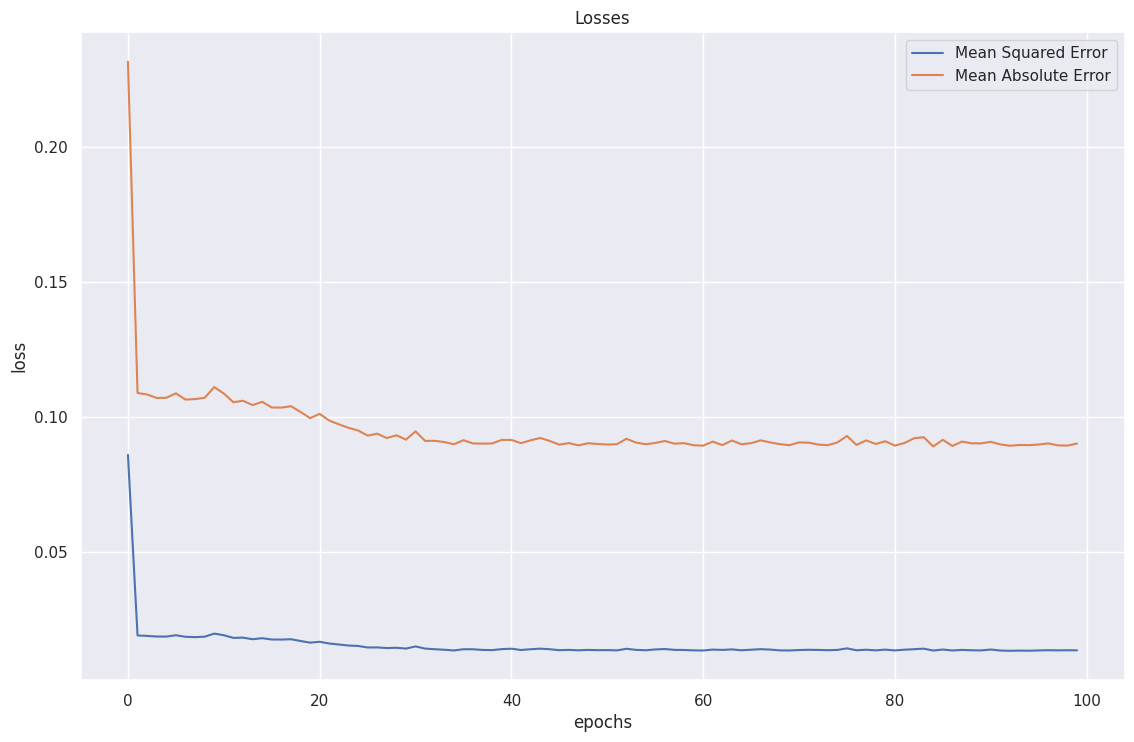

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#Melakukan prediksi
Data test dibuatkan dengan 18 time steps, kemudian dilakukan juga standardisasi dengan scaler.inverse_transform serta mengkomputasi root mean square error.

In [ ]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 50
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [ ]:
# Get Prediction
predictions = model.predict(x_test)

14/14 [==============================] - 2s 72ms/step


In [ ]:
predictions.shape

(427, 1)

In [ ]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(427, 1)

In [ ]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [ ]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.24

#Plotting prediksi

In [ ]:

preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts


,Predictions,Actuals
0,29.367672,30.1
1,29.701725,30.2
2,29.753534,26.0
3,27.763517,27.7
4,28.556942,29.0
...,...,...
422,27.484221,26.3
423,27.226274,25.9
424,26.925747,26.2
425,26.978853,26.3


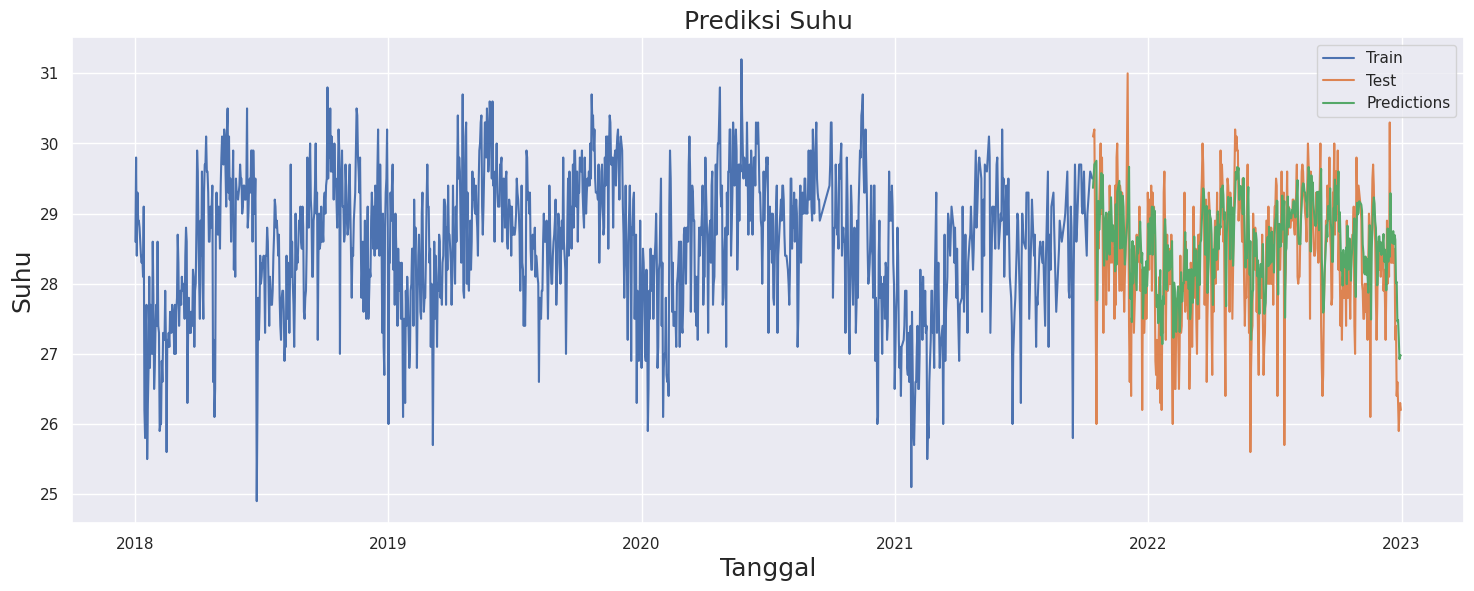

In [ ]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Prediksi Suhu', fontsize= 18)
plt.xlabel('Tanggal', fontsize= 18)
plt.ylabel('Suhu', fontsize= 18)
plt.plot(train['Tavg'])
plt.plot(test['Tavg'])
plt.plot(test["Predictions"])
plt.legend(['Train', 'Test', 'Predictions'])

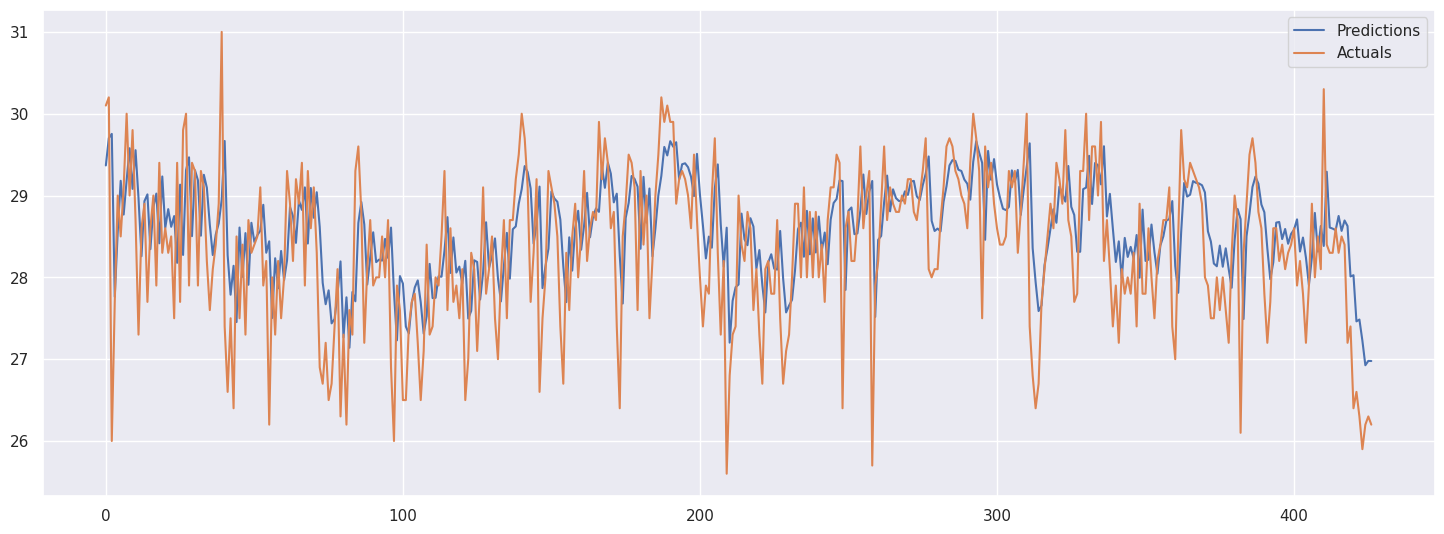

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

In [ ]:
preds_acts = pd.DataFrame(data={'Prediksi':predictions.flatten()})
preds_acts

,Prediksi
0,29.367672
1,29.701725
2,29.753534
3,27.763517
4,28.556942
...,...
422,27.484221
423,27.226274
424,26.925747
425,26.978853


#Kesimpulan
Walaupun model tidak dapat memprediksi semua titik dengan akurat, model masih dapat memprediksi beberapa titik dengan akurat. Kedepannya akan dicoba model dengan hasil overfitting yang lebih kecil lagi.